# Ryan Oelker's Filtergraph website is a great resource for getting pre-processed light curves

[https://filtergraph.com/tess_ffi](https://filtergraph.com/tess_ffi)

In order to download light curves in bulk, we'll need to filter the data to contain only 4 columns of data: TIC ID, Sector, Camera and CCD. 

![filtergraph](TESSfiltergraph.png)

Once you have these options filtered, display the results as a Table (default is scatter plot). You can then download X amount of light curves as a ASCII, space seperated file. For this exercise, let's enter 25 in the "rows" entry field.


## By default, the saved .txt file will have a space in its filename (ex: Sector 01.txt). Rename this file to Sector_01.txt with no spaces. 

Once you have a Sector_N.txt file (N=number), you can use the get_curves.py script to download each target. I would recommend creating a new folder for each Sector you study. 

From your command terminal, enter the following command:
```js
python get_curves.py Sector_01.txt 
```

Make sure your virtual environments are activated and that these files are in the same directory.


## Now that we have our light curves downloaded, let's create a for loop to iteratively load in the .lc files and plot them to see what they look like

In [1]:
# First import these modules

# These are used to employ your computers operating system (os) to
# search through your directories for specific files.
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch

# These are used for plotting and numerical tasks
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np

In [14]:
#Now we're going to define a variable with the path name of where our light curves are located

#path where data is stored
SectorNum = int(input()) #<--- will ask you for Sector number: enter 1, 2, 3, etc
#^^^ A new entry field underthis cell will open and will not proceed without an input number.
# Since we are checking out Sector 1, enter 1.

print("TESS Sector",'{:02d}'.format(SectorNum)) 
# ^^^ This adds a 0 in front of numbers 1-9. For numbers 10 and greater, this will not put a 0 in front.

path = '/Users/felizd/Desktop/TESS/Sector'+str('{:02d}'.format(SectorNum))+'/curves/clean'

#path where figures will be saved
figpath = '/Users/felizd/Desktop/TESS/Sector'+str('{:02d}'.format(SectorNum))+'/plots/' 


#This portion of code is designed to recursively search through a directory 
#for all files in the path that end with .lc in their filename
data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print ("number of files: ",len(data)) #number of files)

1
TESS Sector 01
number of files:  24


In [27]:
print(path)
print(figpath)

print(" ")

print(data) #<--- This will print a list full of strings with our light curve filenames.
#^^^ The reason we want strings is that numpy's loadtxt commands requires filenames that are 
# being read in to be strings.

/Users/felizd/Desktop/TESS/Sector01/curves/clean
/Users/felizd/Desktop/TESS/Sector01/plots/
 
['/Users/felizd/Desktop/TESS/Sector01/curves/clean/114919247_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/114985772_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/115175750_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/126583789_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/126909993_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/126910743_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/129637152_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/129683871_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/147113993_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/147114607_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/clean/147132816_sector01_1_1.lc', '/Users/felizd/Desktop/TESS/Sector01/curves/cle

## Instead of trying to read that jumbled mess above, we can use a for loop to print each file individually

In [28]:
# for x in range(len(data)): #<--- will print every light curve file in path 
# ^^^ (if you have hundreds of files, you may not want to do this)
for x in range(5): #just printing the first 5 light curve files
    print (data[x])
    print("TIC ", ((os.path.basename(data[x]).split)('_')[0]) )
    print(" ")

/Users/felizd/Desktop/TESS/Sector01/curves/clean/114919247_sector01_1_1.lc
TIC  114919247
 
/Users/felizd/Desktop/TESS/Sector01/curves/clean/114985772_sector01_1_1.lc
TIC  114985772
 
/Users/felizd/Desktop/TESS/Sector01/curves/clean/115175750_sector01_1_1.lc
TIC  115175750
 
/Users/felizd/Desktop/TESS/Sector01/curves/clean/126583789_sector01_1_1.lc
TIC  126583789
 
/Users/felizd/Desktop/TESS/Sector01/curves/clean/126909993_sector01_1_1.lc
TIC  126909993
 


## Now, let's see what these light curves look like by creating a for loop to load in each .lc file

Note: for for-loops, you can use any variable, not just x. Below I use "ii". 

/Users/felizd/Desktop/TESS/Sector01/plots/TIC_114919247_Sector01_Camera_1_CCD_1.png


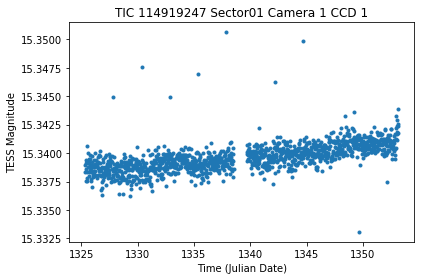

 
/Users/felizd/Desktop/TESS/Sector01/plots/TIC_114985772_Sector01_Camera_1_CCD_1.png


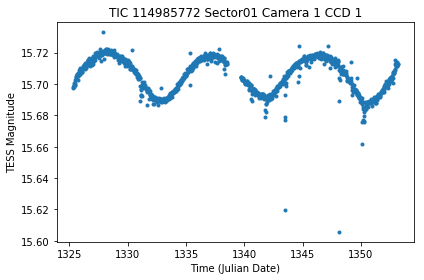

 
/Users/felizd/Desktop/TESS/Sector01/plots/TIC_115175750_Sector01_Camera_1_CCD_1.png


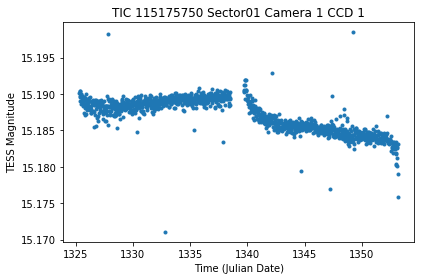

 
/Users/felizd/Desktop/TESS/Sector01/plots/TIC_126583789_Sector01_Camera_1_CCD_1.png


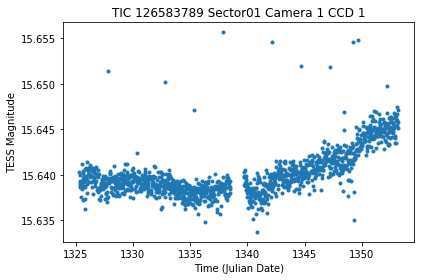

 
/Users/felizd/Desktop/TESS/Sector01/plots/TIC_126909993_Sector01_Camera_1_CCD_1.png


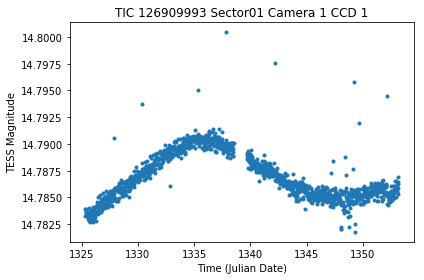

In [29]:
# Now, let's see what these light curves look like by 
# creating a for loop to load in each .lc file

# Note: for for loops, you can use any variable, not just x. Below I use "ii". 

# for ii in range(len(data)): #<--- will print every light curve file in path
for ii in range(5): #just printing the first 5 light curve files
    
    d = np.loadtxt(data[ii])
    
    time = np.transpose(d)[0]
    flux = np.transpose(d)[1]
    flux_error = np.transpose(d)[2]
    
    ID = (os.path.basename(data[ii]).split)('_')[0]
    
    Sector = "S"+(os.path.basename(data[ii]).split)('_')[1][1:] #by default, this has lower case "s"
    #^^^ so I added a capital "S" and remove the first element ("s") of this string
    # with this index slice [1:]. This isn't really imporant, just being tidy.
    
    Camera = (os.path.basename(data[ii]).split)('_')[2] 
    CCD = (os.path.basename(data[ii]).split)('_')[3][-4]
    
    plt.plot(time,flux,marker='.',linestyle='none')
    plt.title("TIC "+ID+" "+Sector+" Camera "+ Camera+" CCD "+ CCD)
    
    plt.xlabel("Time (Julian Date)")
    plt.ylabel("TESS Magnitude")
    plt.tight_layout()
    
    
    
    #We can use our defined variables from our light curve's filenames to save these figures
    print(figpath+"TIC_"+ID+"_"+Sector+"_Camera_"+ Camera+"_CCD_"+ CCD+".png")
    
    plt.savefig(figpath+"TIC_"+ID+"_"+Sector+"_Camera_"+ Camera+"_CCD_"+ CCD+".png")
    plt.show()
    
    print(" ") #<--- adds a space between figures when printed out below